In [1]:
DATA_DIR <- "/Users/Joana/sleep_signature/behaviour/validation/sleep_drive_clock/"
list.files(DATA_DIR)
setwd(DATA_DIR)

[1] "01112022_sleep_quant_violin_repocyc.svg"          
 [2] "01112022_sleep_repocyc.svg"                       
 [3] "05012023_acp_per_tim.eps"                         
 [4] "05012023_repo_cyc.eps"                            
 [5] "07112022_10x_conditions.jpeg"                     
 [6] "12092022.svg"                                     
 [7] "13092022.svg"                                     
 [8] "19092022_bar_cag_hag_nobatch_original.svg"        
 [9] "25102022_base_rebound_repocyc.svg"                
[10] "25102022_sleep_trace_repocyc.svg"                 
[11] "26102022_barplot_cag_hag_sqrt_overlap_nobatch.svg"
[12] "26102022_sleep_quant_violin_repocyc.svg"          
[13] "26102022_sleep_repocyc.svg"                       
[14] "batches_1-5.svg"                                  
[15] "batches1-5.svg"                                   
[16] "bout_length_2h.svg"                               
[17] "bout_length.svg"                                  
[18] "ethoscope_cache"                                  
[19] "long_SD"                                          
[20] "metadata_homeoclock_12h_lesscyc.csv"              
[21] "metadata_homeoclock_12h.csv"                      
[22] "metadata_homeoclock_combined.csv"                 
[23] "metadata_homeoclock.csv"                          
[24] "metadata_manipulate_sleepdrive_select.csv"        
[25] "metadata_manipulate_sleepdrive.csv"               
[26] "metadata_rebound_curated.csv"                     
[27] "metadata_rebound.csv"                             
[28] "metadata_thermo_rebound_selected.csv"             
[29] "metadata_thermo_rebound.csv"                      
[30] "n_bouts_2h.svg"                                   
[31] "n_bouts.svg"                                      
[32] "repo_cyc_quant.png"                               
[33] "repo_cyc_sleep_trace.png"                         
[34] "test_2h.svg"                                      
[35] "test.svg"

In [2]:
library(dplyr)
library(reshape2)
library(behavr)
library(scopr)
library(sleepr)
library(tidyverse)
library(ggetho)
library(ggpubr)
library(rstatix)
library(data.table)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

Loading required package: data.table

Attaching package: ‘data.table’

The following objects are masked from ‘package:reshape2’:

    dcast, melt

The following objects are masked from ‘package:dplyr’:

    between, first, last

Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.3.6     ✔ readr   2.1.2
✔ tibble  3.1.8     ✔ purrr   0.3.4
✔ tidyr   1.2.1     ✔ stringr 1.4.1
✔ ggplot2 3.3.6     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ data.table::between() masks dplyr::between()
✖ dplyr::filter()       masks stats::filter()
✖ data.table::first()   masks dplyr::first()
✖ dplyr::lag()          masks stat

ERROR: Error in library(ggpubr): there is no package called ‘ggpubr’


In [3]:
#loading and reading metadata file
metadata <- fread("/Users/Joana/sleep_signature/behaviour/validation/sleep_drive_clock/metadata_homeoclock_combined.csv")
metadata$date <- as.character(metadata$date)
metadata$fly <- seq(1, by = 1, length.out = nrow(metadata))

In [4]:
metadata$manipulation <- "control"
metadata$manipulation[metadata$genotype %in% c("R56F03-Gal4>UAS-Clk-delta",
                                               "alrm-Gal4;alrm-Gal4>UAS-Clk-delta",
                                               "alrm-Gal4(II)>UAS-Clk-delta",
                                               "alrm-Gal4;R56F03-Gal4>UAS-Clk-delta",
                                               "R85G01-Gal4>UAS-Clk-delta",
                                               "R86E01-Gal4>UAS-Clk-delta",
                                               "Clk856-Gal4>UAS-Clk-delta",
                                               "alrm-Gal4(III)>UAS-Clk-delta",
                                               "tub-Gal80ts;repo-Gal4>UAS-Clk-delta")] <- "Clk-KO"
metadata$manipulation[metadata$genotype %in% c("alrm-Gal4(II)>UAS-Cyc-delta",
                                               "repo-Gal4>UAS-Cyc-delta",
                                               "R56F03-Gal4>UAS-Cyc-delta",
                                               "R85G01-Gal4>UAS-Cyc-delta",
                                               "R86E01-Gal4>UAS-Cyc-delta",
                                               "alrm-Gal4;R56F03-Gal4>UAS-Cyc-delta",
                                               "alrm-Gal4;alrm-Gal4>UAS-Cyc-delta",
                                               "Clk856-Gal4>UAS-Cyc-delta")] <- "Cyc-KO"
metadata$manipulation[metadata$genotype %in% c("alrm-Gal4(II)>UAS-per-RNAi",
                                               "MZ709-Gal4>UAS-per-RNAi", 
                                               "R56F03-Gal4>UAS-per-RNAi", 
                                               "R85G01-Gal4>UAS-per-RNAi", 
                                               "repo-Gal4>UAS-per-RNAi")] <- "per-KD"
metadata$manipulation[metadata$genotype %in% c("R86E01-Gal4>UAS-sgRNA-per",
                                               "alrm-Gal4(III)>UAS-sgRNA-per",
                                               "alrm-Gal4;R56F03-Gal4>UAS-sgRNA-per", 
                                               "repo-Gal4>UAS-sgRNA-per",
                                               "Clk856-Gal4>UAS-sgRNA-per")] <- "per-K0"
metadata$manipulation[metadata$genotype %in% c("repo-Gal4>UAS-sgRNA-tim",
                                               "alrm-Gal4;alrm-Gal4>UAS-sgRNA-tim",
                                               "alrm-Gal4(III)>UAS-sgRNA-tim",
                                               "alrm-Gal4;R56F03-Gal4>UAS-sgRNA-tim",
                                               "Clk856-Gal4>UAS-sgRNA-tim",
                                               "R86E01-Gal4>UAS-sgRNA-tim",
                                               "R56F03-Gal4>UAS-sgRNA-tim",
                                               "Clk856-Gal4>UAS-sgRNA-tim")] <- "tim-K0"
metadata$manipulation[metadata$genotype %in% c("R56F03-Gal4>UAS-shiTS",
                                               "alrm-Gal4(II); tub-Gal80>UAS-shiTS")] <- "shiTS-KD"
metadata$manipulation[metadata$genotype %in% c("repo-Gal4>UAS-Ca-alpha1D-RNAi", 
                                               "R86E01-Gal4>UAS-PMCA-RNAi",
                                               "repo-Gal4>UAS-PMCA-RNAi",
                                               "repo-Gal4>UAS-E23-RNAi")] <- "calcium"

In [9]:
metadata_n <- metadata[, .(`number_flies` = .N), by=.(genotype, manipulation)]

genotype,manipulation,number_flies
R56F03-Gal4>UAS-per-RNAi,per-KD,21
iso31>UAS-per-RNAi,control,19
repo-Gal4>iso31,control,119
repo-Gal4>UAS-per-RNAi,per-KD,18
alrm-Gal4(II)>UAS-Cyc-delta,Cyc-KO,47
alrm-Gal4(II)>iso31,control,59
repo-Gal4>UAS-Cyc-delta,Cyc-KO,183
R56F03-Gal4>iso31,control,56
R56F03-Gal4>UAS-Clk-delta,Clk-KO,70
R85G01-Gal4>UAS-per-RNAi,per-KD,18


In [5]:
metadata_12 <- subset(metadata, SD_duration==12)

In [6]:
#Linking metadata with ethoscope
metadata_12 <- link_ethoscope_metadata(metadata_12, 
                                    result_dir = "/ethoscope_data/results")

searching the provided database for data matching query
parsing date and time
processing rows without time
... removing duplicates i.e. no 2 db files will be from same ethoscope and day.
  If more than 1 is found, we keep the last. A warning will be emitted in that case
Warning message in build_query(result_dir, query, index_file):
“Several files (2) in machine ETHOSCOPE_015 and date 2022-10-21.
      Keeping last file (2022-10-21 12:55:24). Use a `time` column if this is not intended.}”Warning message in build_query(result_dir, query, index_file):
“Several files (2) in machine ETHOSCOPE_030 and date 2022-10-21.
      Keeping last file (2022-10-21 12:13:35). Use a `time` column if this is not intended.}”Warning message in build_query(result_dir, query, index_file):
“Several files (2) in machine ETHOSCOPE_009 and date 2022-10-26.
      Keeping last file (2022-10-26 10:39:11). Use a `time` column if this is not intended.}”Warning message in build_query(result_dir, query, index_file):
“Se

In [7]:
#load_ethoscope by different reference_hour
#min_time_immobile to check that there is no sleep at all during SD perio
system.time(
  dt <- load_ethoscope(metadata_12,
                         reference_hour=NA, 
                         FUN = sleepr::sleep_annotation,
                         # FUN_filter = scopr::Mode_filter,
                         cache = "/ethoscope_data/cache", 
                         velocity_correction_coef=0.0048,
                         #min_time_immobile=60,
                         verbose=TRUE)
)


Time window length: 10
Min time immobile: 300
Velocity correction coefficient: 0.0048

Time window length: 10
Min time immobile: 300
Velocity correction coefficient: 0.0048

Time window length: 10
Min time immobile: 300
Velocity correction coefficient: 0.0048

Time window length: 10
Min time immobile: 300
Velocity correction coefficient: 0.0048

Time window length: 10
Min time immobile: 300
Velocity correction coefficient: 0.0048

Time window length: 10
Min time immobile: 300
Velocity correction coefficient: 0.0048

Time window length: 10
Min time immobile: 300
Velocity correction coefficient: 0.0048

Time window length: 10
Min time immobile: 300
Velocity correction coefficient: 0.0048

Time window length: 10
Min time immobile: 300
Velocity correction coefficient: 0.0048

Time window length: 10
Min time immobile: 300
Velocity correction coefficient: 0.0048

Time window length: 10
Min time immobile: 300
Velocity correction coefficient: 0.0048

Time window length: 10
Min time immobile: 

    user   system  elapsed 
4333.906   42.581 2416.538 

In [8]:
# phase variable
dt[, phase := ifelse(t %% hours(24) < hours(12), "L", "D")]

In [10]:
print(metadata_n, nrows = 100)

                               genotype manipulation number_flies
 1:            R56F03-Gal4>UAS-per-RNAi       per-KD           21
 2:                  iso31>UAS-per-RNAi      control           19
 3:                     repo-Gal4>iso31      control          119
 4:              repo-Gal4>UAS-per-RNAi       per-KD           18
 5:         alrm-Gal4(II)>UAS-Cyc-delta       Cyc-KO           47
 6:                 alrm-Gal4(II)>iso31      control           59
 7:             repo-Gal4>UAS-Cyc-delta       Cyc-KO          183
 8:                   R56F03-Gal4>iso31      control           56
 9:           R56F03-Gal4>UAS-Clk-delta       Clk-KO           70
10:            R85G01-Gal4>UAS-per-RNAi       per-KD           18
11:         alrm-Gal4(II)>UAS-Clk-delta       Clk-KO           62
12:          alrm-Gal4(II)>UAS-per-RNAi       per-KD            8
13:                    MZ709-Gal4>iso31      control           26
14:                 iso31>UAS-Clk-delta      control          140
15:       

In [21]:
metadata

machine_name,date,region_id,genotype,age_loading,sex,batch,reference_hour,incubator,food,...,rpm,interval,opto,start_SD,SD_duration,n_base_nights,start_base_night,extra_outcross,fly,manipulation
ETHOSCOPE_014,2022-08-26,1,R56F03-Gal4>UAS-per-RNAi,3_4,F,1,9,S2,"sucrose5%, agar2%",...,72,10,21,47,2.5,1,12,x,1,per-KD
ETHOSCOPE_014,2022-08-26,3,R56F03-Gal4>UAS-per-RNAi,3_4,F,1,9,S2,"sucrose5%, agar2%",...,72,10,21,47,2.5,1,12,x,2,per-KD
ETHOSCOPE_014,2022-08-26,5,R56F03-Gal4>UAS-per-RNAi,3_4,F,1,9,S2,"sucrose5%, agar2%",...,72,10,21,47,2.5,1,12,x,3,per-KD
ETHOSCOPE_014,2022-08-26,7,R56F03-Gal4>UAS-per-RNAi,3_4,F,1,9,S2,"sucrose5%, agar2%",...,72,10,21,47,2.5,1,12,x,4,per-KD
ETHOSCOPE_014,2022-08-26,9,R56F03-Gal4>UAS-per-RNAi,3_4,F,1,9,S2,"sucrose5%, agar2%",...,72,10,21,47,2.5,1,12,x,5,per-KD
ETHOSCOPE_014,2022-08-26,12,iso31>UAS-per-RNAi,3_4,F,1,9,S2,"sucrose5%, agar2%",...,72,10,21,47,2.5,1,12,x,6,control
ETHOSCOPE_014,2022-08-26,14,iso31>UAS-per-RNAi,3_4,F,1,9,S2,"sucrose5%, agar2%",...,72,10,21,47,2.5,1,12,x,7,control
ETHOSCOPE_014,2022-08-26,16,iso31>UAS-per-RNAi,3_4,F,1,9,S2,"sucrose5%, agar2%",...,72,10,21,47,2.5,1,12,x,8,control
ETHOSCOPE_014,2022-08-26,18,iso31>UAS-per-RNAi,3_4,F,1,9,S2,"sucrose5%, agar2%",...,72,10,21,47,2.5,1,12,x,9,control
ETHOSCOPE_014,2022-08-26,20,iso31>UAS-per-RNAi,3_4,F,1,9,S2,"sucrose5%, agar2%",...,72,10,21,47,2.5,1,12,x,10,control


# screening the data

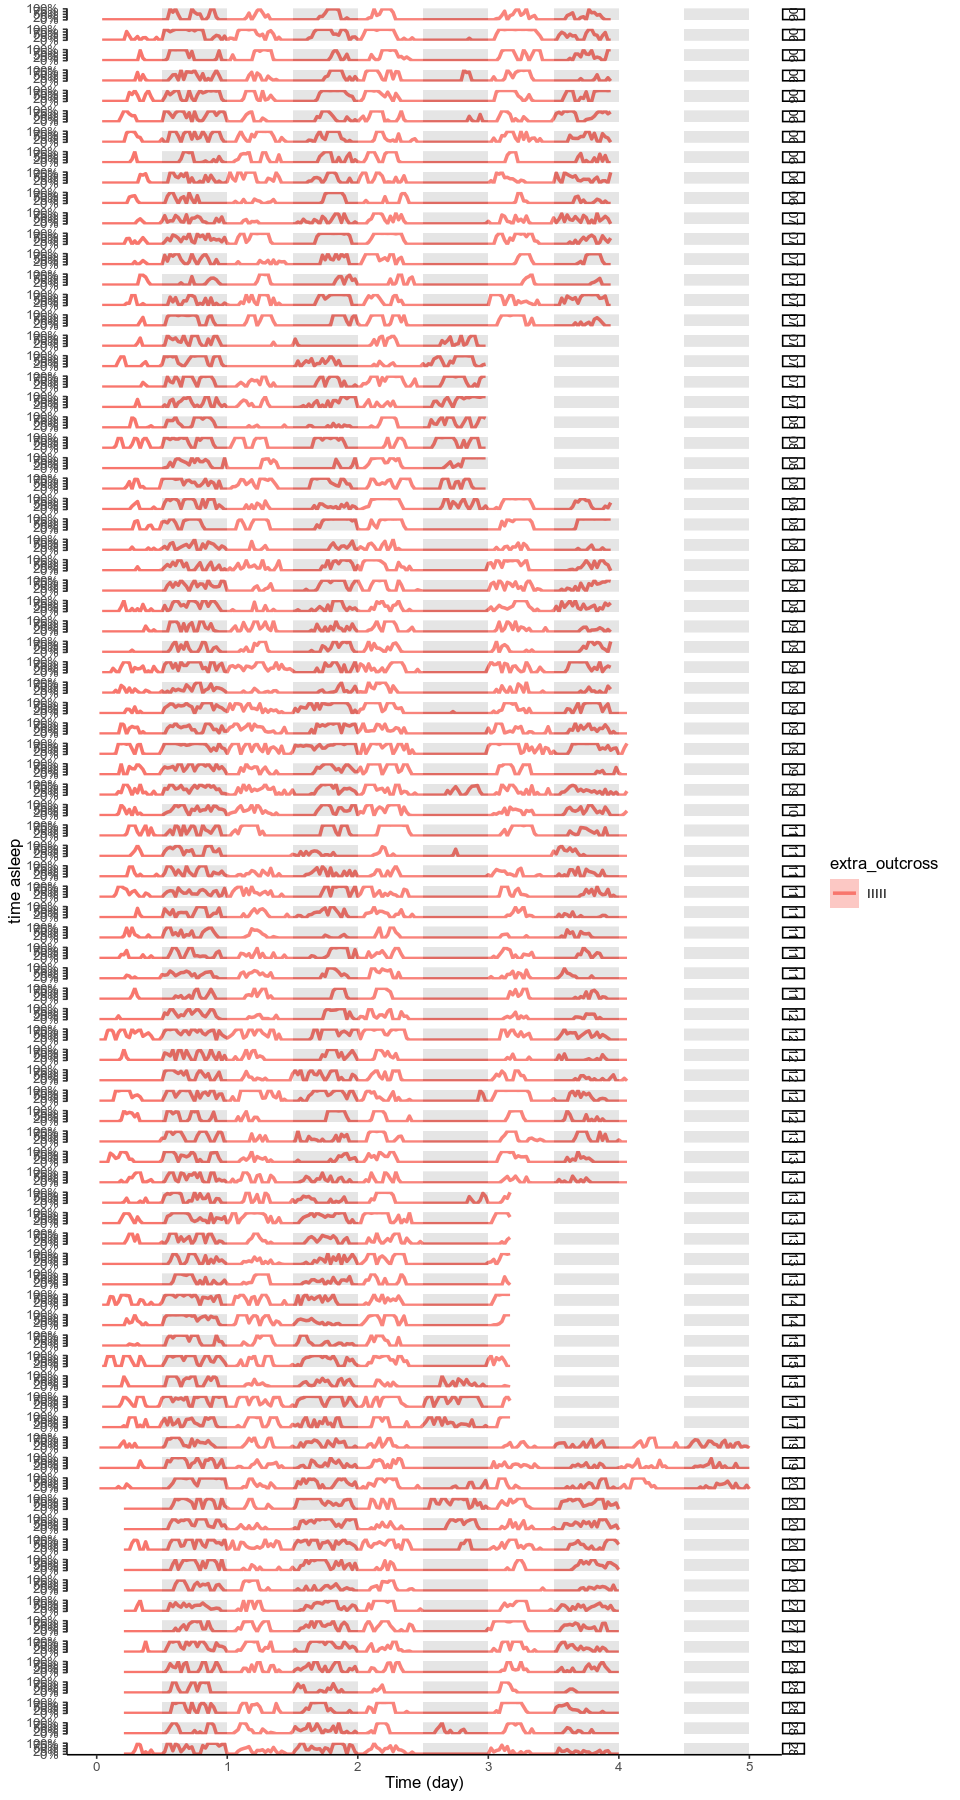

In [27]:
options(repr.plot.width = 8, repr.plot.height = 15, warn=-1)

ggetho(dt[xmv(genotype) == "iso31>UAS-Cyc-delta" & xmv(extra_outcross) == "IIIII"], 
       aes(y=asleep, color=extra_outcross, fill=extra_outcross)) +
  stat_pop_etho() +
  stat_ld_annotations(height = 1, alpha=0.1, outline=NA) +
  facet_grid(fly ~ .)+
  theme_classic(base_size=10)+
  scale_y_continuous("time asleep", labels = scales::percent)

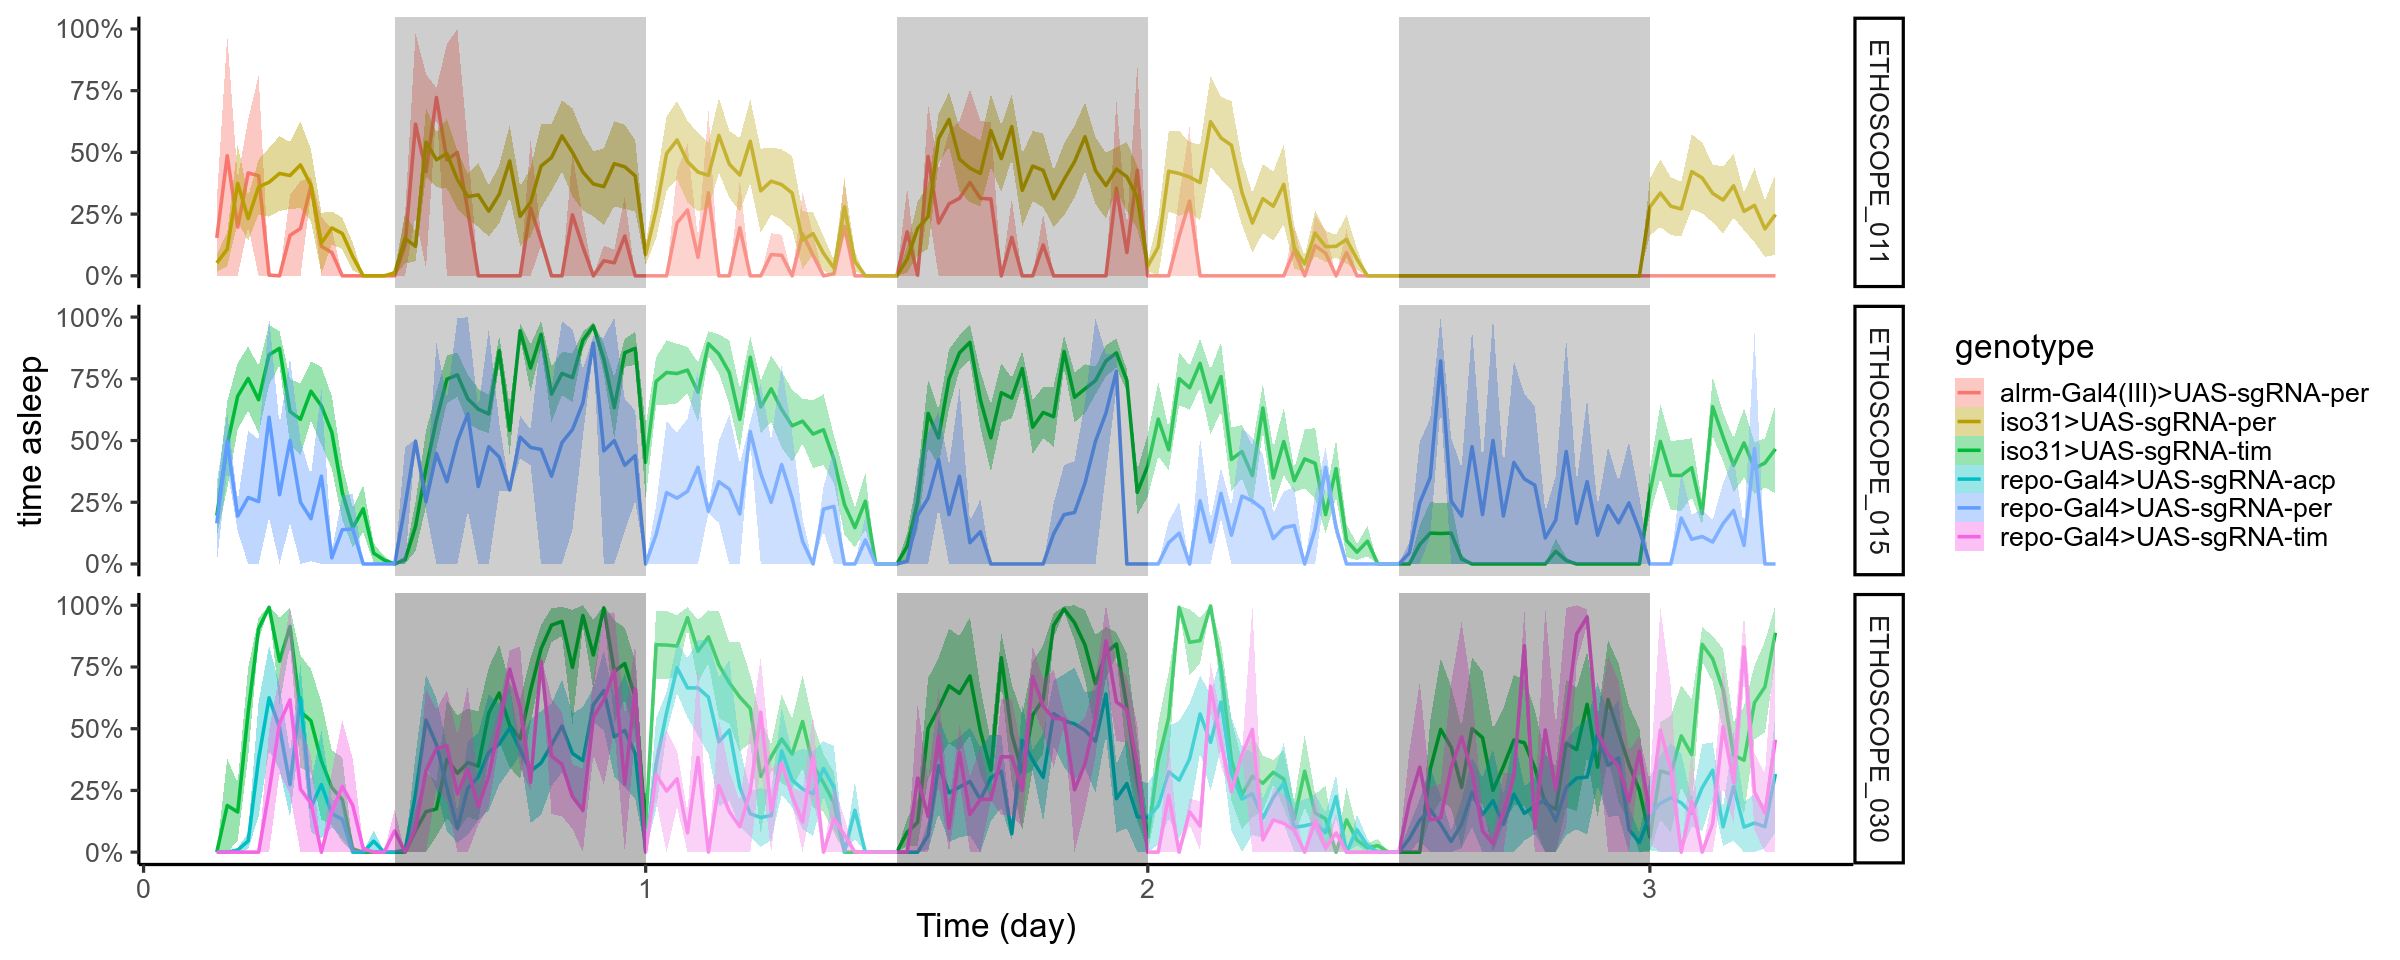

In [12]:
options(repr.plot.width = 20, repr.plot.height = 8, warn=-1)

ggetho(dt[xmv(batch) %in% c("55") & xmv(machine_name) %in% c("ETHOSCOPE_011", "ETHOSCOPE_015", "ETHOSCOPE_030")], aes(y=asleep, color=genotype, fill=genotype)) +
  stat_pop_etho() +
  stat_ld_annotations(height = 1, alpha=0.1, outline=NA) +
  facet_grid(machine_name ~ .)+
  theme_classic(base_size=20)+
  scale_y_continuous("time asleep", labels = scales::percent)

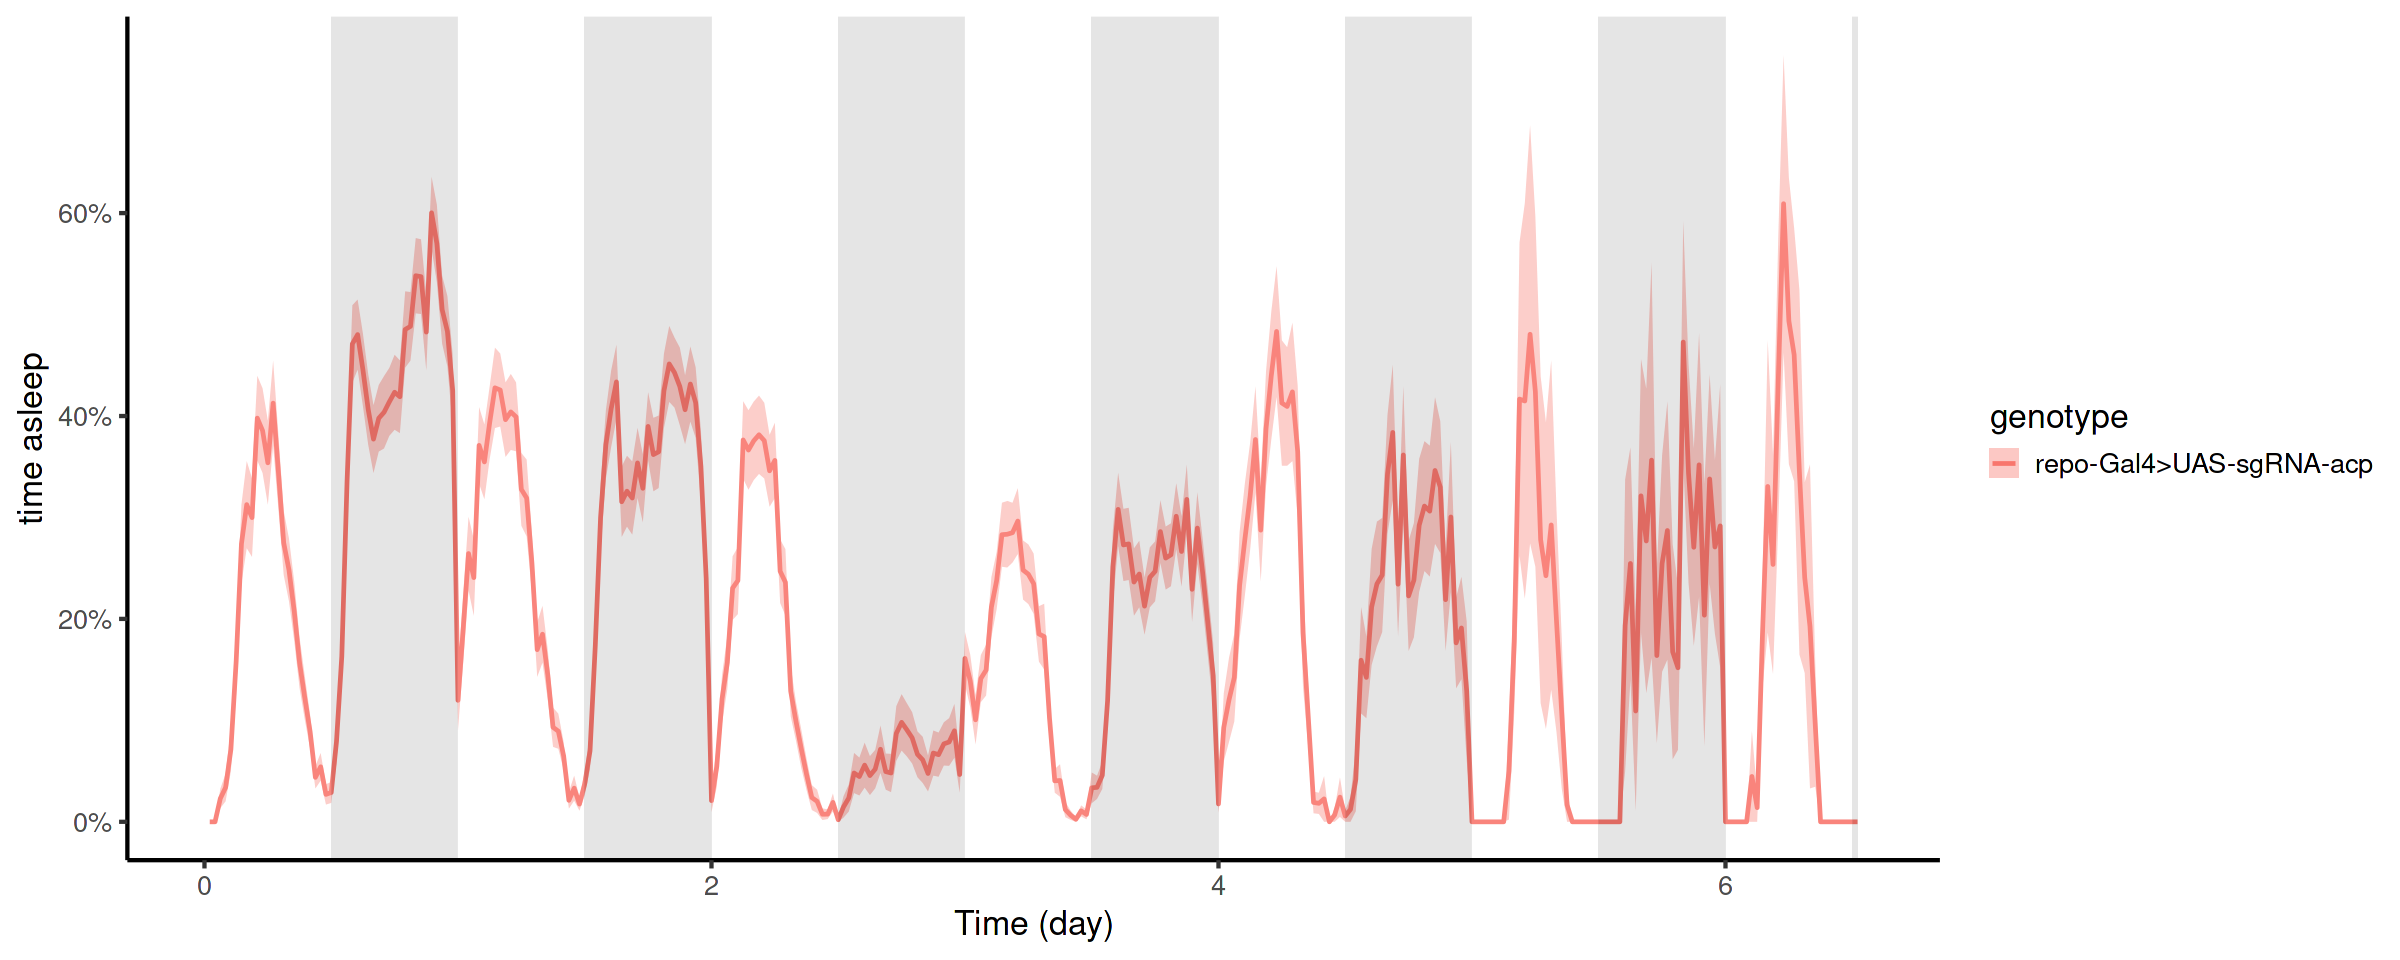

In [101]:
options(repr.plot.width = 20, repr.plot.height = 8, warn=-1)

ggetho(dt[xmv(genotype) == "repo-Gal4>UAS-sgRNA-acp" ], aes(y=asleep, color=genotype, fill=genotype)) +
  stat_pop_etho() +
  stat_ld_annotations(height = 1, alpha=0.1, outline=NA) +
  #facet_grid(fly ~ .)+
  theme_classic(base_size=20)+
  scale_y_continuous("time asleep", labels = scales::percent)

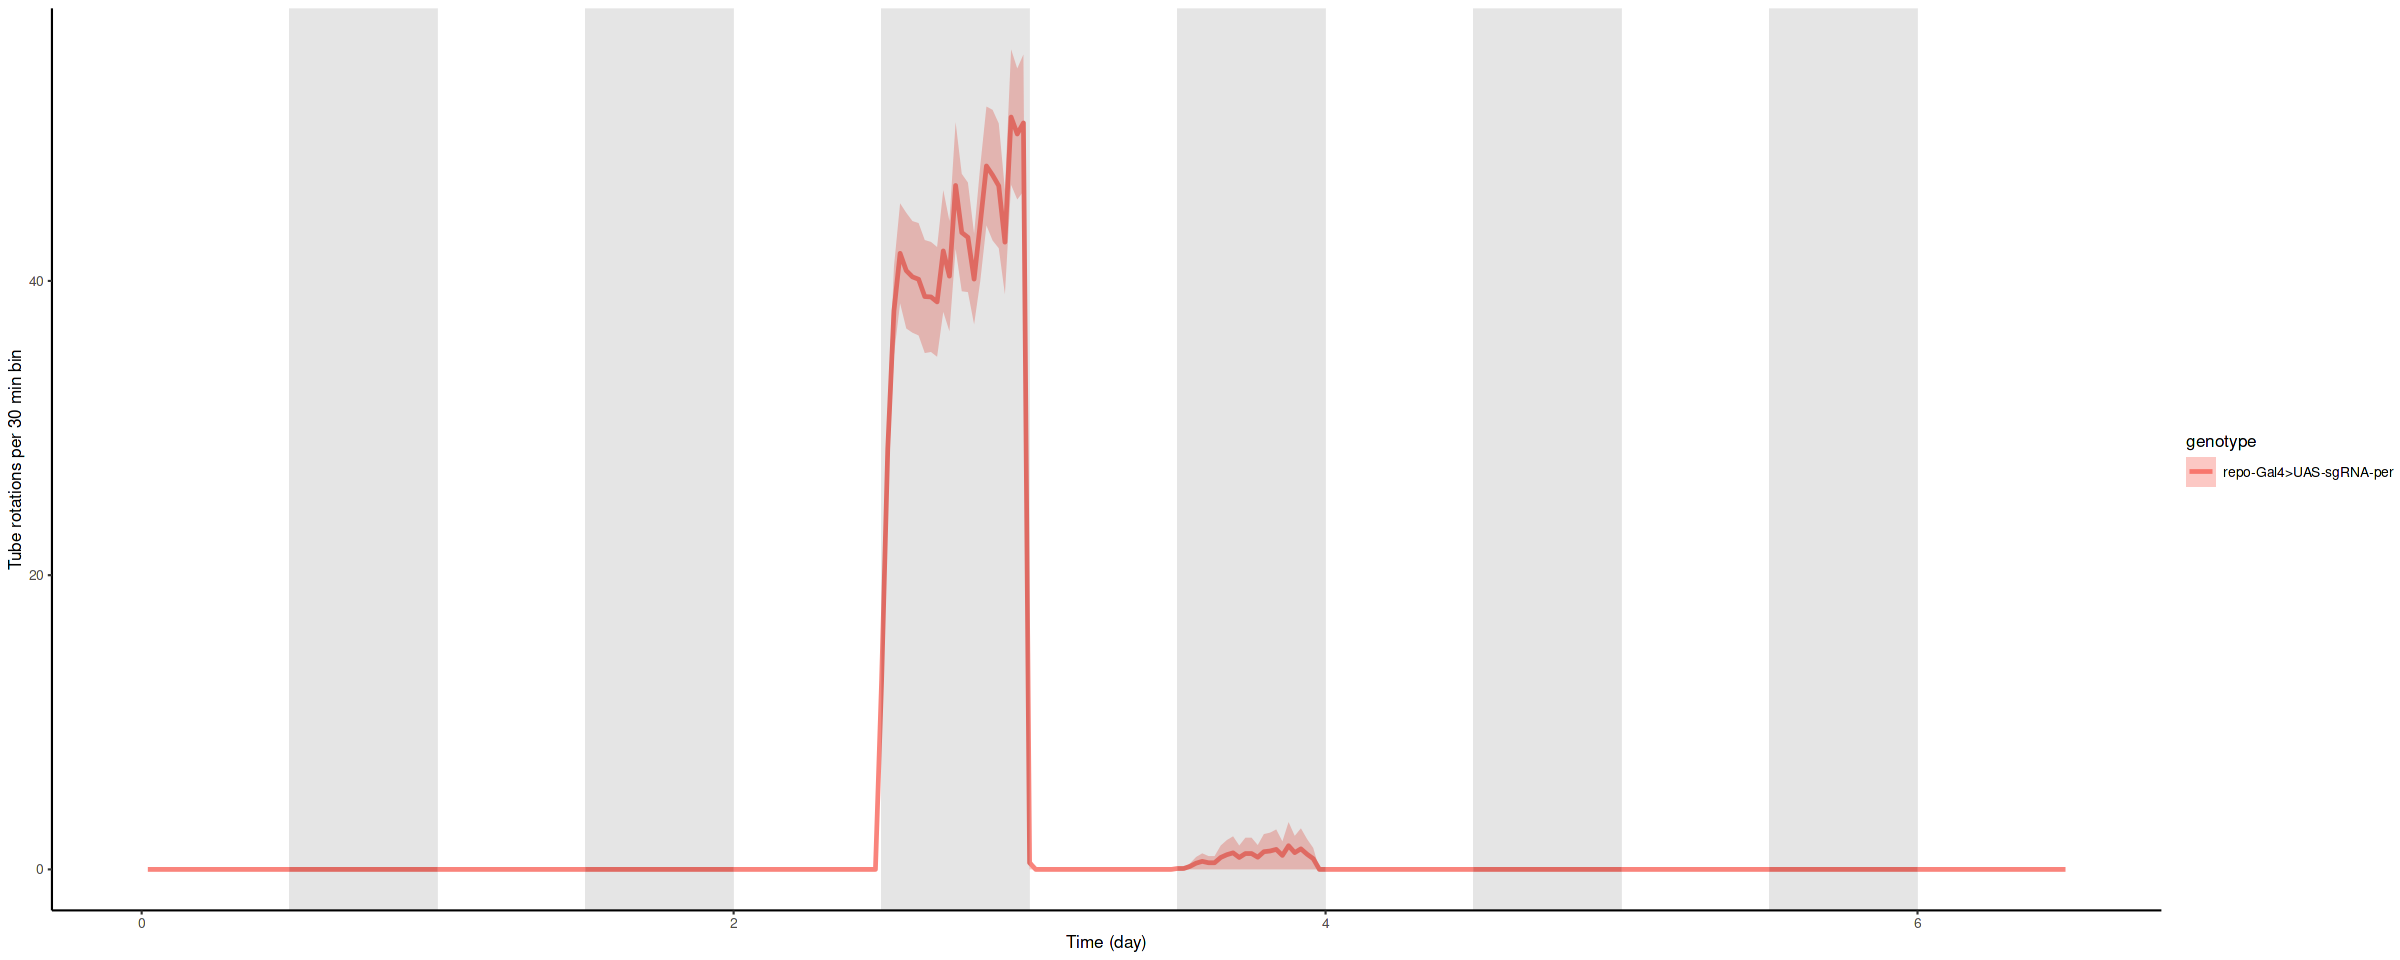

In [96]:
options(repr.plot.width = 20, repr.plot.height = 8, warn=-1)

ggetho(dt[xmv(genotype) %in% c("repo-Gal4>UAS-sgRNA-per")], aes(y=interactions, colour=genotype), summary_FUN = sum, summary_time_window = mins(30))+
  stat_pop_etho()+
  stat_ld_annotations(height = 1, alpha=0.1, outline=NA)+
  #facet_grid(fly ~ .)+
  theme_classic(base_size=10)+
  labs(y="Tube rotations per 30 min bin")

# curating flies based on degree of sleep deprivation and baseline sleep during the night

In [17]:
length(metadata_12$id)

[1] 1663

In [14]:
# 1-exclude those flies with more than 0(0.002) sleep during sd - dt_60
dt[, SD := (t >= behavr::hours(xmv(start_SD)) & t < (behavr::hours(xmv(start_SD)) + behavr::hours(xmv(SD_duration))))]
dt_sd <- dt[SD==TRUE, .(asleep_sd= mean(asleep)), by = id]
dt_sd$curate <- dt_sd$asleep_sd > 0
dt_sd_curated <- dt_sd[curate==F,.(id=id)]
dt_sd_curated

id
2022-10-21_12-13-35_030aad|03
2022-10-21_12-13-35_030aad|05
2022-10-21_12-13-35_030aad|07
2022-10-21_12-15-35_009aad|01
2022-10-21_12-15-35_009aad|03
2022-10-21_12-15-35_009aad|05
2022-10-21_12-15-35_009aad|07
2022-10-21_12-15-35_009aad|09
2022-10-21_12-15-35_009aad|12
2022-10-21_12-15-35_009aad|14


In [15]:
length(dt_sd_curated$id)

[1] 1069

In [15]:
# 2-exclude flies that have at least 50% of nighttime baseline sleep compared to all flies of the same genotype
dt[, base_night_sleep := (phase == "D" & t <= behavr::days(xmv(n_base_nights)))]
dt_base_night_sleep <- dt[base_night_sleep==TRUE, .(asleep_base_night_sleep = mean(asleep)), by = id]
dt_base_night_sleep[, asleep_base_night_sleep:=720*asleep_base_night_sleep]
dt_base_night_sleep

id,asleep_base_night_sleep
2022-10-21_12-13-35_030aad|01,170.7500
2022-10-21_12-13-35_030aad|03,522.0833
2022-10-21_12-13-35_030aad|05,528.2500
2022-10-21_12-13-35_030aad|07,504.0833
2022-10-21_12-15-35_009aad|01,302.5833
2022-10-21_12-15-35_009aad|03,515.6667
2022-10-21_12-15-35_009aad|05,264.2500
2022-10-21_12-15-35_009aad|07,384.9167
2022-10-21_12-15-35_009aad|09,185.2500
2022-10-21_12-15-35_009aad|12,594.0833


In [45]:
#merge with genotype and calculate average base_night_sleep by genotype
base_night_sleep_genotype <- dt_base_night_sleep[, .(asleep_base_night_sleep_avg = mean(asleep_base_night_sleep)), by = .(genotype=xmv(genotype))]
base_night_sleep_genotype

genotype,asleep_base_night_sleep_avg
Clk856-Gal4>UAS-Cyc-delta,261.29135
repo-Gal4>UAS-Cyc-delta,469.99576
repo-Gal4>iso31,514.72865
iso31>UAS-Cyc-delta,302.13118
tub-Gal80ts;repo-Gal4>UAS-Clk-delta,435.05357
repo-Gal4>UAS-Ca-alpha1D-RNAi,433.30207
alrm-Gal4;alrm-Gal4>UAS-Cyc-delta,365.88085
alrm-Gal4;R56F03-Gal4>iso31,334.28558
alrm-Gal4(III)>iso31,447.97882
R86E01-Gal4>iso31,443.25822


In [46]:
#merge average amount of baseline sleep as a column to DF with value by id
base_night_sleep_curated <- left_join(x = rejoin(dt_base_night_sleep), y = base_night_sleep_genotype)
base_night_sleep_curated$curate_night <- base_night_sleep_curated$asleep_base_night_sleep < 0.2*base_night_sleep_curated$asleep_base_night_sleep_avg
base_night_sleep_curated <- base_night_sleep_curated[curate_night == F,.(id=id)]
base_night_sleep_curated

Joining, by = "genotype"

id
2022-10-21_12-13-35_030aad|01
2022-10-21_12-13-35_030aad|03
2022-10-21_12-13-35_030aad|05
2022-10-21_12-13-35_030aad|07
2022-10-21_12-15-35_009aad|01
2022-10-21_12-15-35_009aad|03
2022-10-21_12-15-35_009aad|05
2022-10-21_12-15-35_009aad|07
2022-10-21_12-15-35_009aad|09
2022-10-21_12-15-35_009aad|12


In [19]:
#combined_curated <- merge(x = base_night_sleep_curated, y = dt_sd_curated, by = "id")
metadata_curated <- as.data.table(merge(x = dt_sd_curated, y = metadata_12, by = "id"))
metadata_curated_n <- metadata_curated[, .(number_flies = .N), by=.(genotype, manipulation)]

In [20]:
metadata_curated_n

genotype,manipulation,number_flies
repo-Gal4>UAS-Cyc-delta,Cyc-KO,89
Clk856-Gal4>UAS-Cyc-delta,Cyc-KO,18
repo-Gal4>iso31,control,48
iso31>UAS-Cyc-delta,control,186
tub-Gal80ts;repo-Gal4>UAS-Clk-delta,Clk-KO,6
repo-Gal4>UAS-Ca-alpha1D-RNAi,calcium,11
alrm-Gal4;alrm-Gal4>UAS-Cyc-delta,Cyc-KO,16
alrm-Gal4;R56F03-Gal4>iso31,control,17
alrm-Gal4(III)>iso31,control,29
R86E01-Gal4>iso31,control,20


In [21]:
dt_curated = data.table::copy(dt)

In [22]:
setkey(metadata_curated, id)
setkey(dt_curated, id)
setmeta(dt_curated, metadata_curated)

In [23]:
nrow(dt_curated)

[1] 54986576

# scanning data after curation

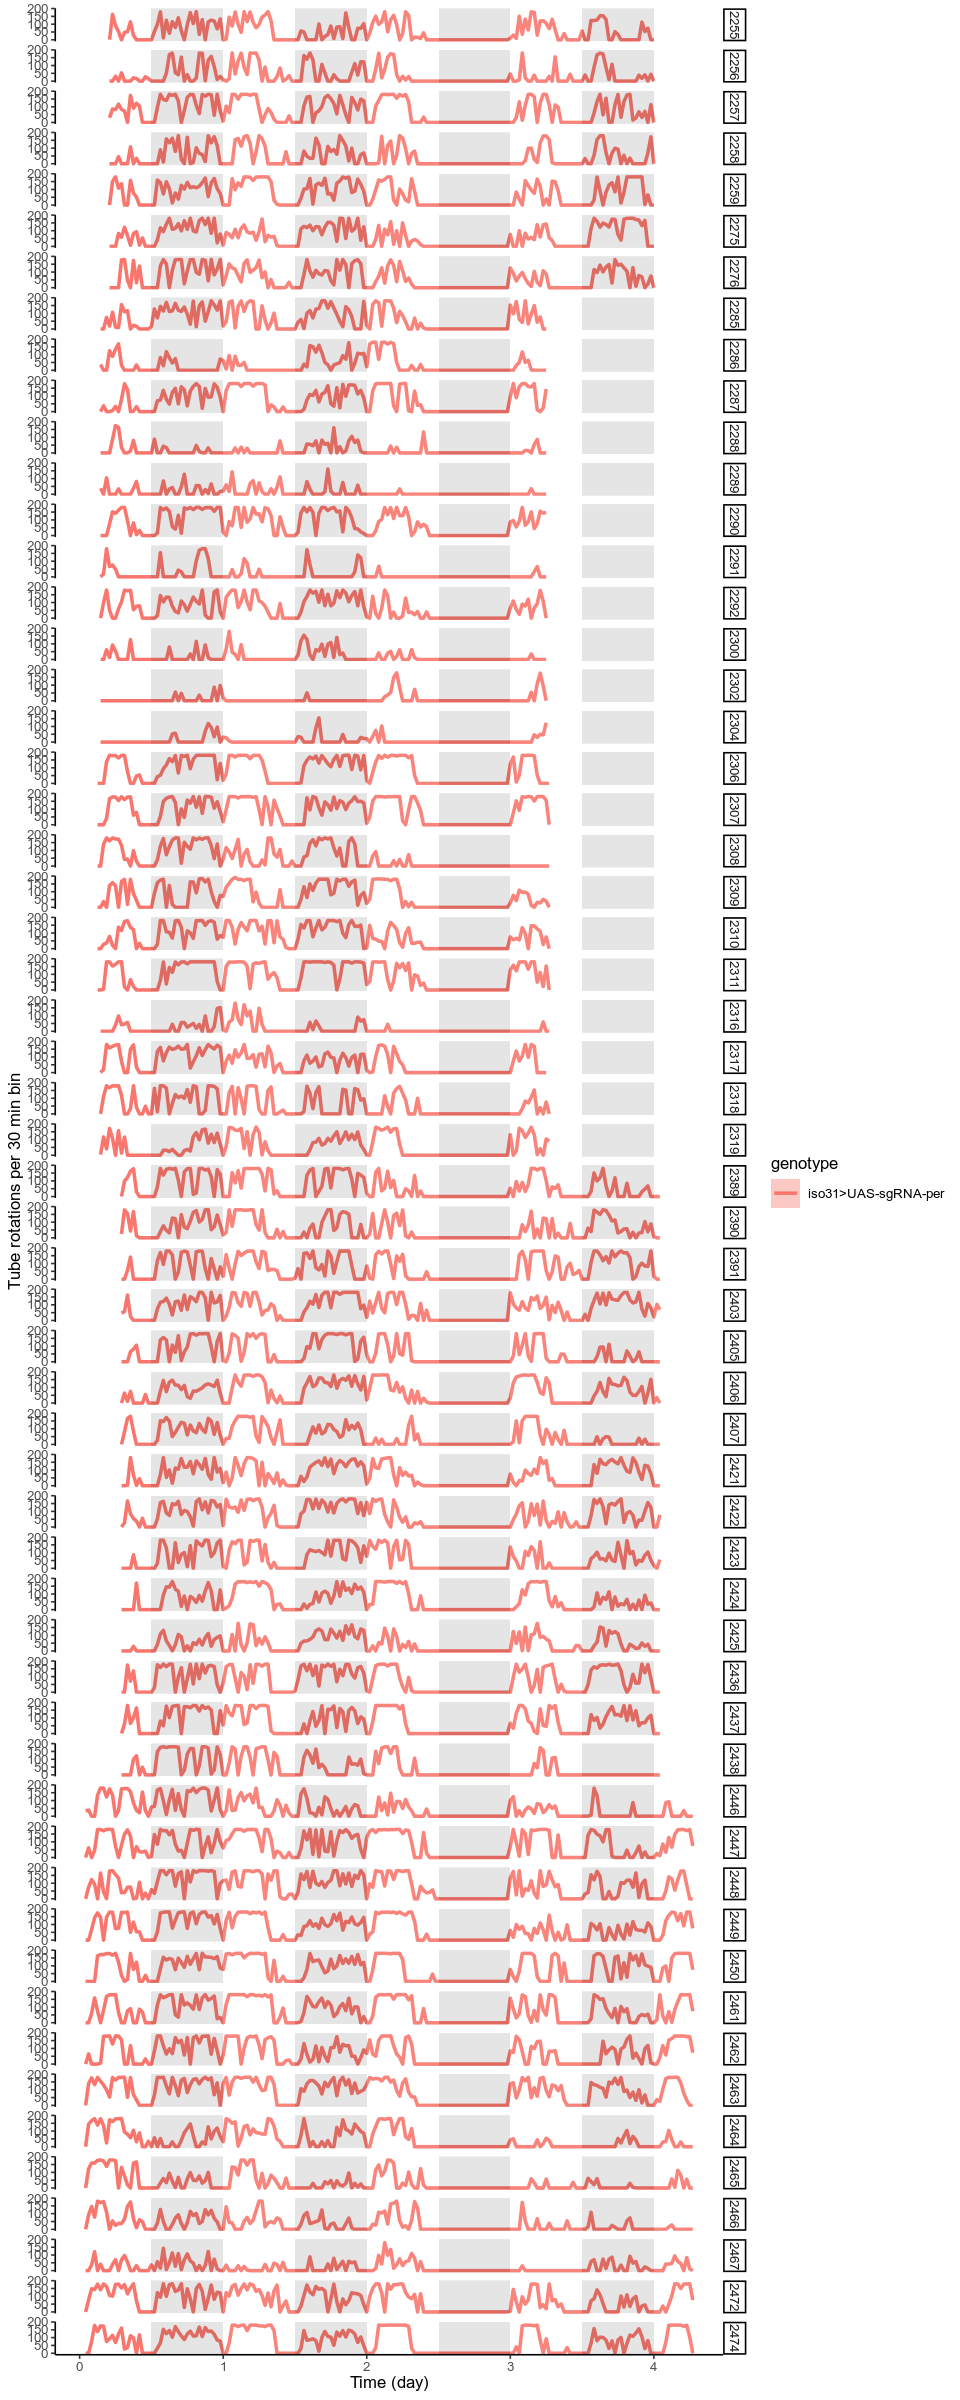

In [25]:
options(repr.plot.width = 8, repr.plot.height = 20, warn=-1)

ggetho(dt_curated[xmv(genotype) %in% c("iso31>UAS-sgRNA-per")], aes(y=asleep, colour=genotype), summary_FUN = sum, summary_time_window = mins(30))+
  stat_pop_etho()+
  stat_ld_annotations(height = 1, alpha=0.1, outline=NA)+
  facet_grid(fly ~ .)+
  theme_classic(base_size=10)+
  labs(y="Tube rotations per 30 min bin")

# calculate mean asleep over rebound baseline period, define rebound_duration in mins

In [26]:
#in minutes
rebound_duration <- 180

In [27]:
#time asleep for the two baselines ZT0-rebound_duration
dt_curated[, rebound_base := (t >= behavr::hours(48) & t < behavr::hours(48) + behavr::mins(rebound_duration) | t >= behavr::hours(24) & t < behavr::hours(24) + behavr::hours(rebound_duration))]
dt_rebound_base <- dt_curated[rebound_base==TRUE, .(asleep_rebound_base = mean(asleep)), by = id]
dt_rebound_base[,asleep_rebound_base:= rebound_duration*asleep_rebound_base]

In [28]:
#calculate mean asleep over rebound period ZT0-rebound_duration
dt_curated[, rebound := (t >= behavr::hours(xmv(start_SD)) + behavr::hours(xmv(SD_duration)) & t < behavr::hours(72) + behavr::mins(rebound_duration))]
#dt[, rebound := (t >= behavr::hours(72) & t < behavr::hours(72) + behavr::mins(rebound_duration))]
dt_rebound <- dt_curated[rebound==TRUE, .(asleep_rebound = mean(asleep)), by = id]
dt_rebound[,asleep_rebound:= rebound_duration*asleep_rebound]

In [ ]:
#lost sleep
#sleep amount during sd period, already calculated this above when excluding flies with failed SD
#dt[, SD := (t >= hours(60) & t < hours(72) )] #should give the same as below
#dt_curated[, SD := (t >= behavr::hours(xmv(start_SD)) & t < (behavr::hours(xmv(start_SD)) + behavr::hours(xmv(SD_duration))))]
#dt_sd <- dt[SD==TRUE, .(asleep_sd= mean(asleep)), by = id]
dt_sd[,asleep_sd:= 720*asleep_sd]

In [29]:
dt_sd

id,asleep_sd,curate
2022-10-21_12-13-35_030aad|01,0.02060185,TRUE
2022-10-21_12-13-35_030aad|03,0.00000000,FALSE
2022-10-21_12-13-35_030aad|05,0.00000000,FALSE
2022-10-21_12-13-35_030aad|07,0.00000000,FALSE
2022-10-21_12-15-35_009aad|01,0.00000000,FALSE
2022-10-21_12-15-35_009aad|03,0.00000000,FALSE
2022-10-21_12-15-35_009aad|05,0.00000000,FALSE
2022-10-21_12-15-35_009aad|07,0.00000000,FALSE
2022-10-21_12-15-35_009aad|09,0.00000000,FALSE
2022-10-21_12-15-35_009aad|12,0.00000000,FALSE


In [ ]:
#sleep amount during baseline night
dt_curated[, base := (t >= behavr::hours(xmv(start_SD)) - hours(24) & behavr::hours(xmv(SD_duration)) - hours(24))]
#dt[, base := (t >= hours(36) & hours(48) )]
dt_base <- dt_curated[base==TRUE, .(asleep_base = mean(asleep)), by = id]
dt_base[,asleep_base:= 720*asleep_base]

In [ ]:
list_df = list(dt_rebound_base, dt_rebound, dt_base, dt_sd)
dt_calc <- Reduce(function(x, y) merge(x, y, all=FALSE), list_df)

In [ ]:
dt_calc$sleep_gain <- dt_calc$asleep_rebound - dt_calc$asleep_rebound_base
dt_calc$sleep_loss <- dt_calc$asleep_base - dt_calc$asleep_sd
dt_calc$sleep_recovered <- dt_calc$sleep_gain / dt_calc$sleep_loss
dt_calc <- rejoin(dt_calc)
dt_calc_plot <- dt_calc[,c("id", "genotype", "sleep_recovered", "sleep_gain")]
dt_calc_plot_melt <- melt(dt_calc_plot, id.var = c("id", "genotype"))
#colnames(dt_calc_plot_melt) <- c("id", "genotype", "sleep_recovered", "perc_recovered_sleep")

In [ ]:
dt_calc_plot_melt_noneg <- dt_calc_plot_melt[dt_calc_plot_melt$value >=0,]

In [ ]:
ggplot(dt_calc_plot_melt[variable=="sleep_recovered"], aes(x=genotype, y=value, fill=genotype)) +
  geom_boxplot()+
  geom_jitter()+
  #facet_grid(variable ~ .)+
  theme_bw(base_size=25)+
  scale_y_continuous("sleep recovered")+
  ylim(0,0.5)

In [ ]:
# make a function with the plot first, then loop over it for different parameters
rebound_plots <- function(data) {
  filename <- paste0(unique(data$rebound_duration), '_', unique(data$), '.png')
  gg <- ggetho(dt_curated[xmv(genotype) %in% c("repo-Gal4>UAS-sgRNA-tim")], aes(y=interactions, colour=genotype), summary_FUN = sum, summary_time_window = mins(30))+
  stat_pop_etho()+
  stat_ld_annotations(height = 1, alpha=0.1, outline=NA)+
  facet_grid(fly ~ .)+
  theme_classic(base_size=10)+
  labs(y="Tube rotations per 30 min bin")
    
  message(paste0('Saving ', filename))
  ggsave(filename = filename, plot = gg)
  NULL
}

In [ ]:
[, rebound_plots(.SD), by=.(rebound_duration, comparison)]